In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data_xls = pd.read_excel('HOMBRO1.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [4]:
df = pd.read_csv('csvfile.csv',low_memory=False)

In [5]:
df.head()

SEXO  EDAD  HOMBRO DERECHO/IZQUIERDO  DOMINANCIA  DIAGNÓSTICO  \
0     1    70                         0           0            0   
1     1    82                         0           0            0   
2     1    82                         0           0            1   
3     1    58                         0           0            2   
4     1    75                         1           0            2   

   NRS LEVE/MODERADO/GRAVE  NRS  PREINTERVECIÓN(0-10)  MEDICACIÓN ANALGÉSICA  \
0                        2                          5                      1   
1                        2                          5                      2   
2                        3                          8                      3   
3                        3                          8                      3   
4                        3                         10                      2   

   OTROS PROCEDIMIENTOS  PRIMERA/SEGUNDA INFILTRACIÓN  LATINEEN (PUNTUACIÓN)  \
0                     1                             0                     14   
1                     1                             0                     13   
2                     1                             2                     16   
3                     1                             0                     14   
4                     0                             0                     13   

   GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
0                                                  1     
1                                                  1     
2                                                  0     
3                                                  0     
4                                                  0     

   NRS POSTINTERVENCIÓN (0-10)  NRS LEVE/MODERADO/GRAVE.1  \
0                            6                          2   
1                            5                          2   
2                            8                          3   
3                            7                          3   
4                            5                          2   

   LATINEEN POSTINTERVENCIÓN  \
0                         17   
1                          9   
2                          8   
3                          8   
4                          9   

   TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
0                                                  1                                    
1                                                  1                                    
2                                                  0                                    
3                                                  0                                    
4                                                  2                                    

   TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD  DURACIÓN DEL EFECTO  \
0                                        14                    7   
1                                        14                    7   
2                                         1                    1   
3                                         2                    7   
4                                        20                   30   

   EFECTO ANALGÉSICO.   
0                    1  
1                    2  
2                    1  
3                    2  
4                    2

In [9]:
df.describe()

SEXO       EDAD  HOMBRO DERECHO/IZQUIERDO  DOMINANCIA  \
count  18.000000  18.000000                 18.000000        18.0   
mean    0.722222  63.055556                  0.277778         0.0   
std     0.460889  13.930382                  0.460889         0.0   
min     0.000000  37.000000                  0.000000         0.0   
25%     0.250000  58.000000                  0.000000         0.0   
50%     1.000000  64.500000                  0.000000         0.0   
75%     1.000000  72.750000                  0.750000         0.0   
max     1.000000  82.000000                  1.000000         0.0   

       DIAGNÓSTICO  NRS LEVE/MODERADO/GRAVE  NRS  PREINTERVECIÓN(0-10)  \
count    18.000000                18.000000                  18.000000   
mean      1.944444                 2.777778                   7.444444   
std       0.998365                 0.427793                   1.464169   
min       0.000000                 2.000000                   5.000000   
25%       2.000000                 3.000000                   7.000000   
50%       2.000000                 3.000000                   8.000000   
75%       2.000000                 3.000000                   8.000000   
max       4.000000                 3.000000                  10.000000   

       MEDICACIÓN ANALGÉSICA  OTROS PROCEDIMIENTOS  \
count              18.000000             18.000000   
mean                2.777778              0.555556   
std                 1.733937              0.511310   
min                 0.000000              0.000000   
25%                 2.000000              0.000000   
50%                 2.000000              1.000000   
75%                 3.000000              1.000000   
max                 7.000000              1.000000   

       PRIMERA/SEGUNDA INFILTRACIÓN  LATINEEN (PUNTUACIÓN)  \
count                     18.000000              18.000000   
mean                       0.444444              12.555556   
std                        0.783823               2.525685   
min                        0.000000               7.000000   
25%                        0.000000              11.000000   
50%                        0.000000              13.000000   
75%                        0.750000              14.750000   
max                        2.000000              16.000000   

       GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
count                                          18.000000     
mean                                            0.444444     
std                                             0.511310     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.000000     
75%                                             1.000000     
max                                             1.000000     

       NRS POSTINTERVENCIÓN (0-10)  NRS LEVE/MODERADO/GRAVE.1  \
count                    18.000000                  18.000000   
mean                      5.722222                   2.166667   
std                       2.136670                   0.785905   
min                       0.000000                   0.000000   
25%                       5.000000                   2.000000   
50%                       6.000000                   2.000000   
75%                       7.000000                   3.000000   
max                       9.000000                   3.000000   

       LATINEEN POSTINTERVENCIÓN  \
count                  18.000000   
mean                    8.055556   
std                     3.637585   
min                     0.000000   
25%                     6.000000   
50%                     8.000000   
75%                     9.750000   
max                    17.000000   

       TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
count                                          18.000000                                    
mean                 

In [10]:
df.columns.values

array(['SEXO', 'EDAD', 'HOMBRO DERECHO/IZQUIERDO', 'DOMINANCIA',
       'DIAGNÓSTICO', 'NRS LEVE/MODERADO/GRAVE',
       'NRS  PREINTERVECIÓN(0-10)', 'MEDICACIÓN ANALGÉSICA',
       'OTROS PROCEDIMIENTOS', 'PRIMERA/SEGUNDA INFILTRACIÓN',
       'LATINEEN (PUNTUACIÓN)',
       'GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)',
       'NRS POSTINTERVENCIÓN (0-10)', 'NRS LEVE/MODERADO/GRAVE.1',
       'LATINEEN POSTINTERVENCIÓN',
       'TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS',
       'TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD', 'DURACIÓN DEL EFECTO',
       'EFECTO ANALGÉSICO. '], dtype=object)

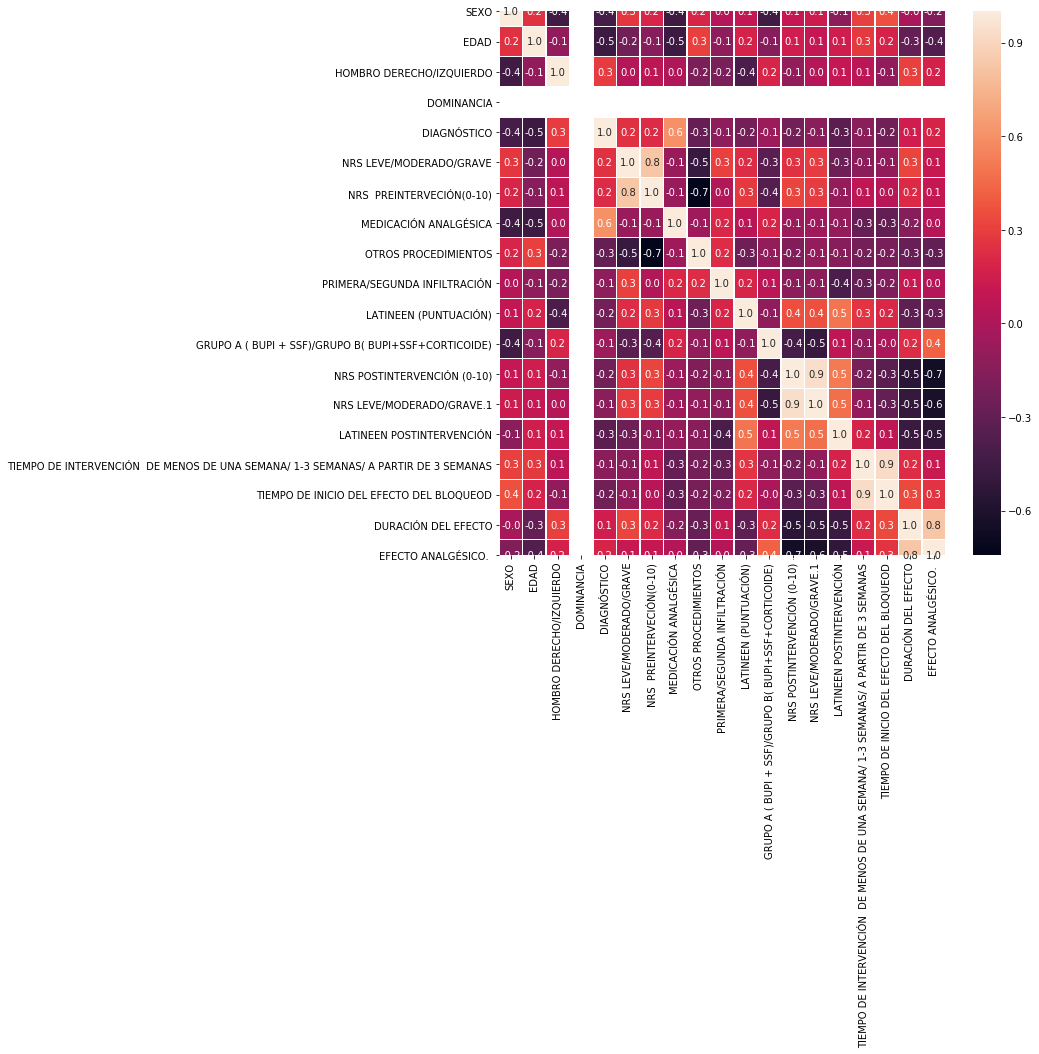

In [13]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.show()

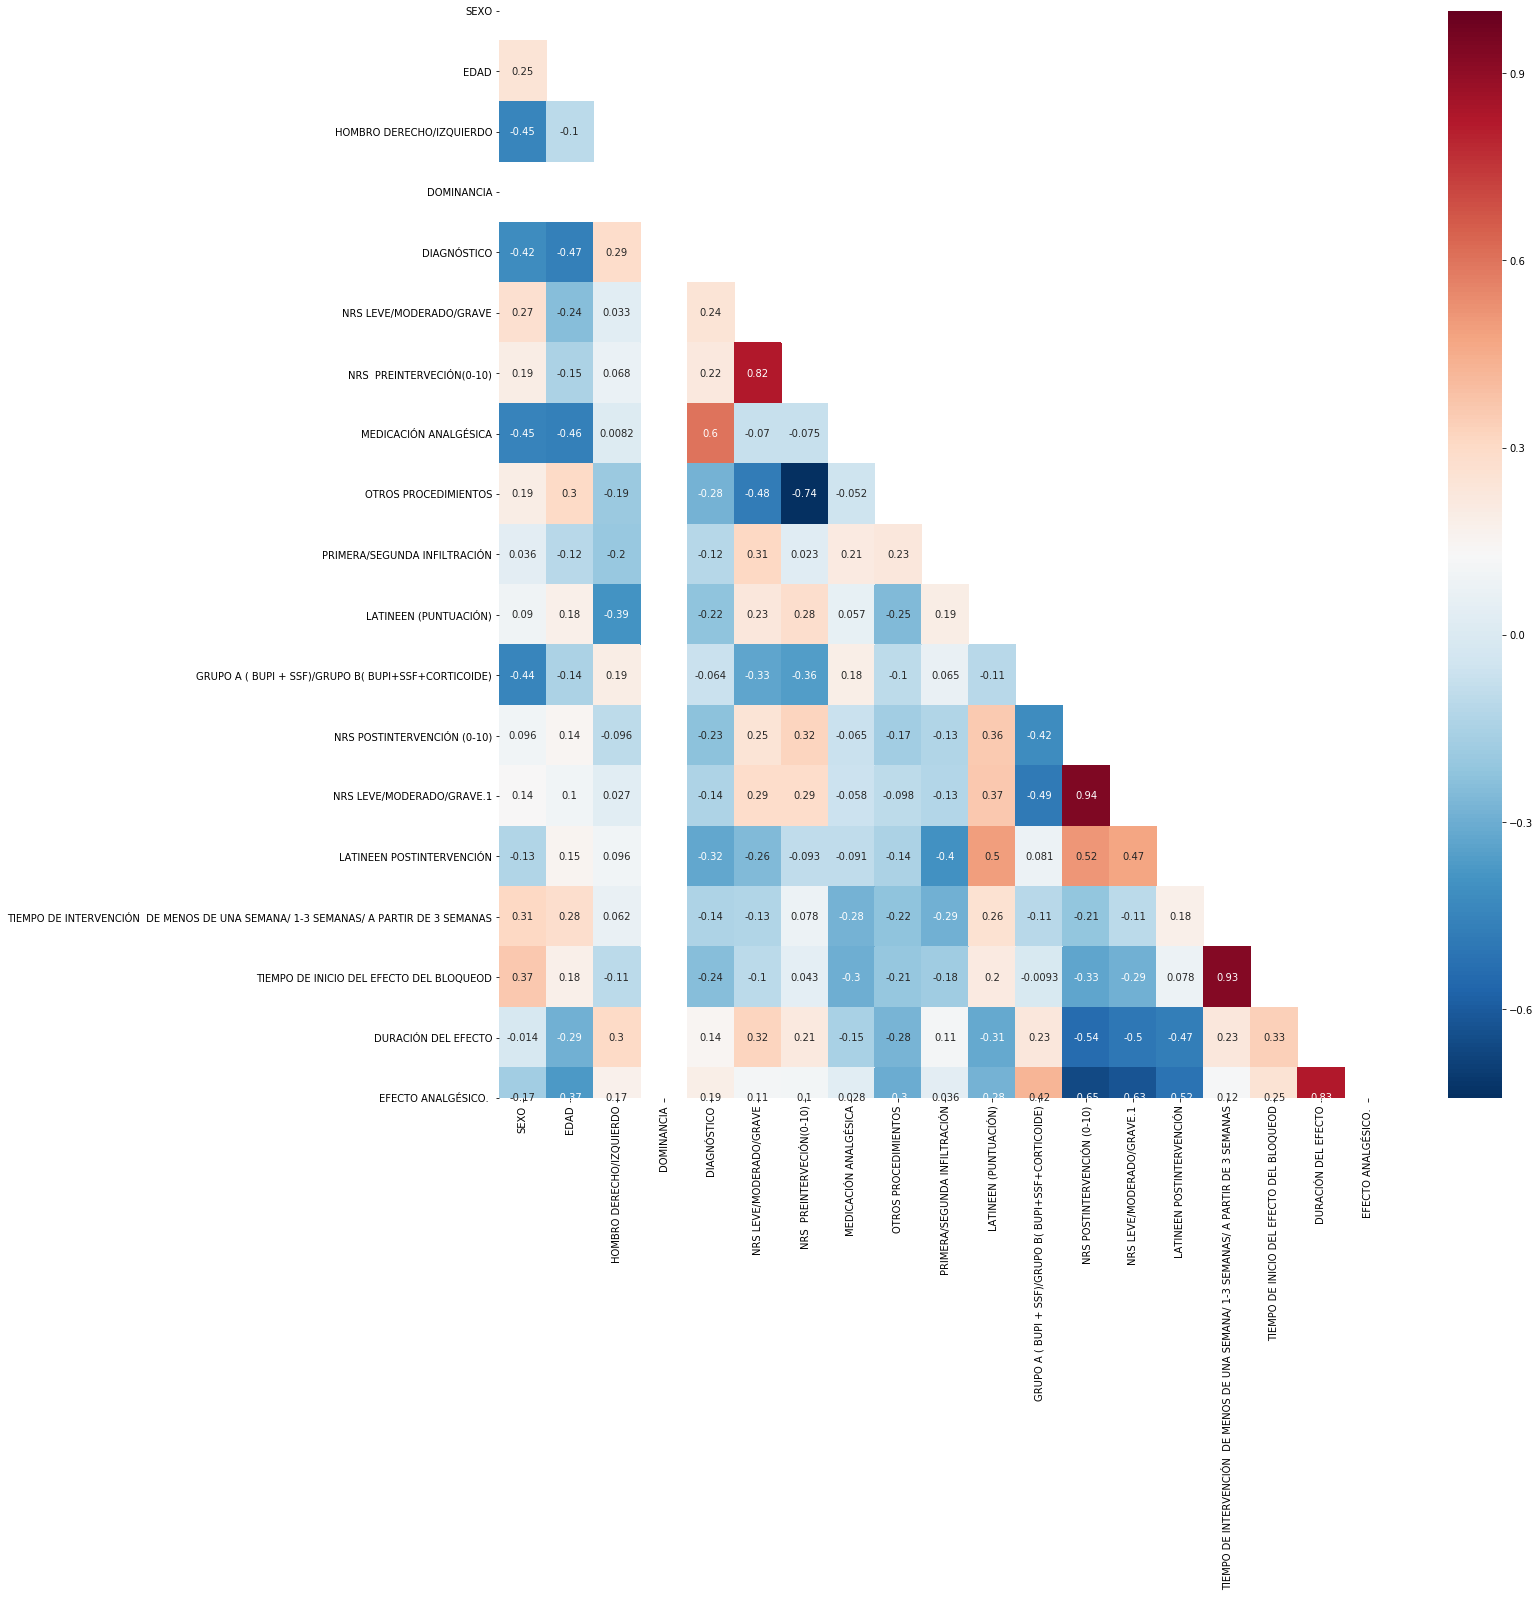

In [14]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [15]:
df.drop(['DOMINANCIA'], axis = 1, inplace = True)

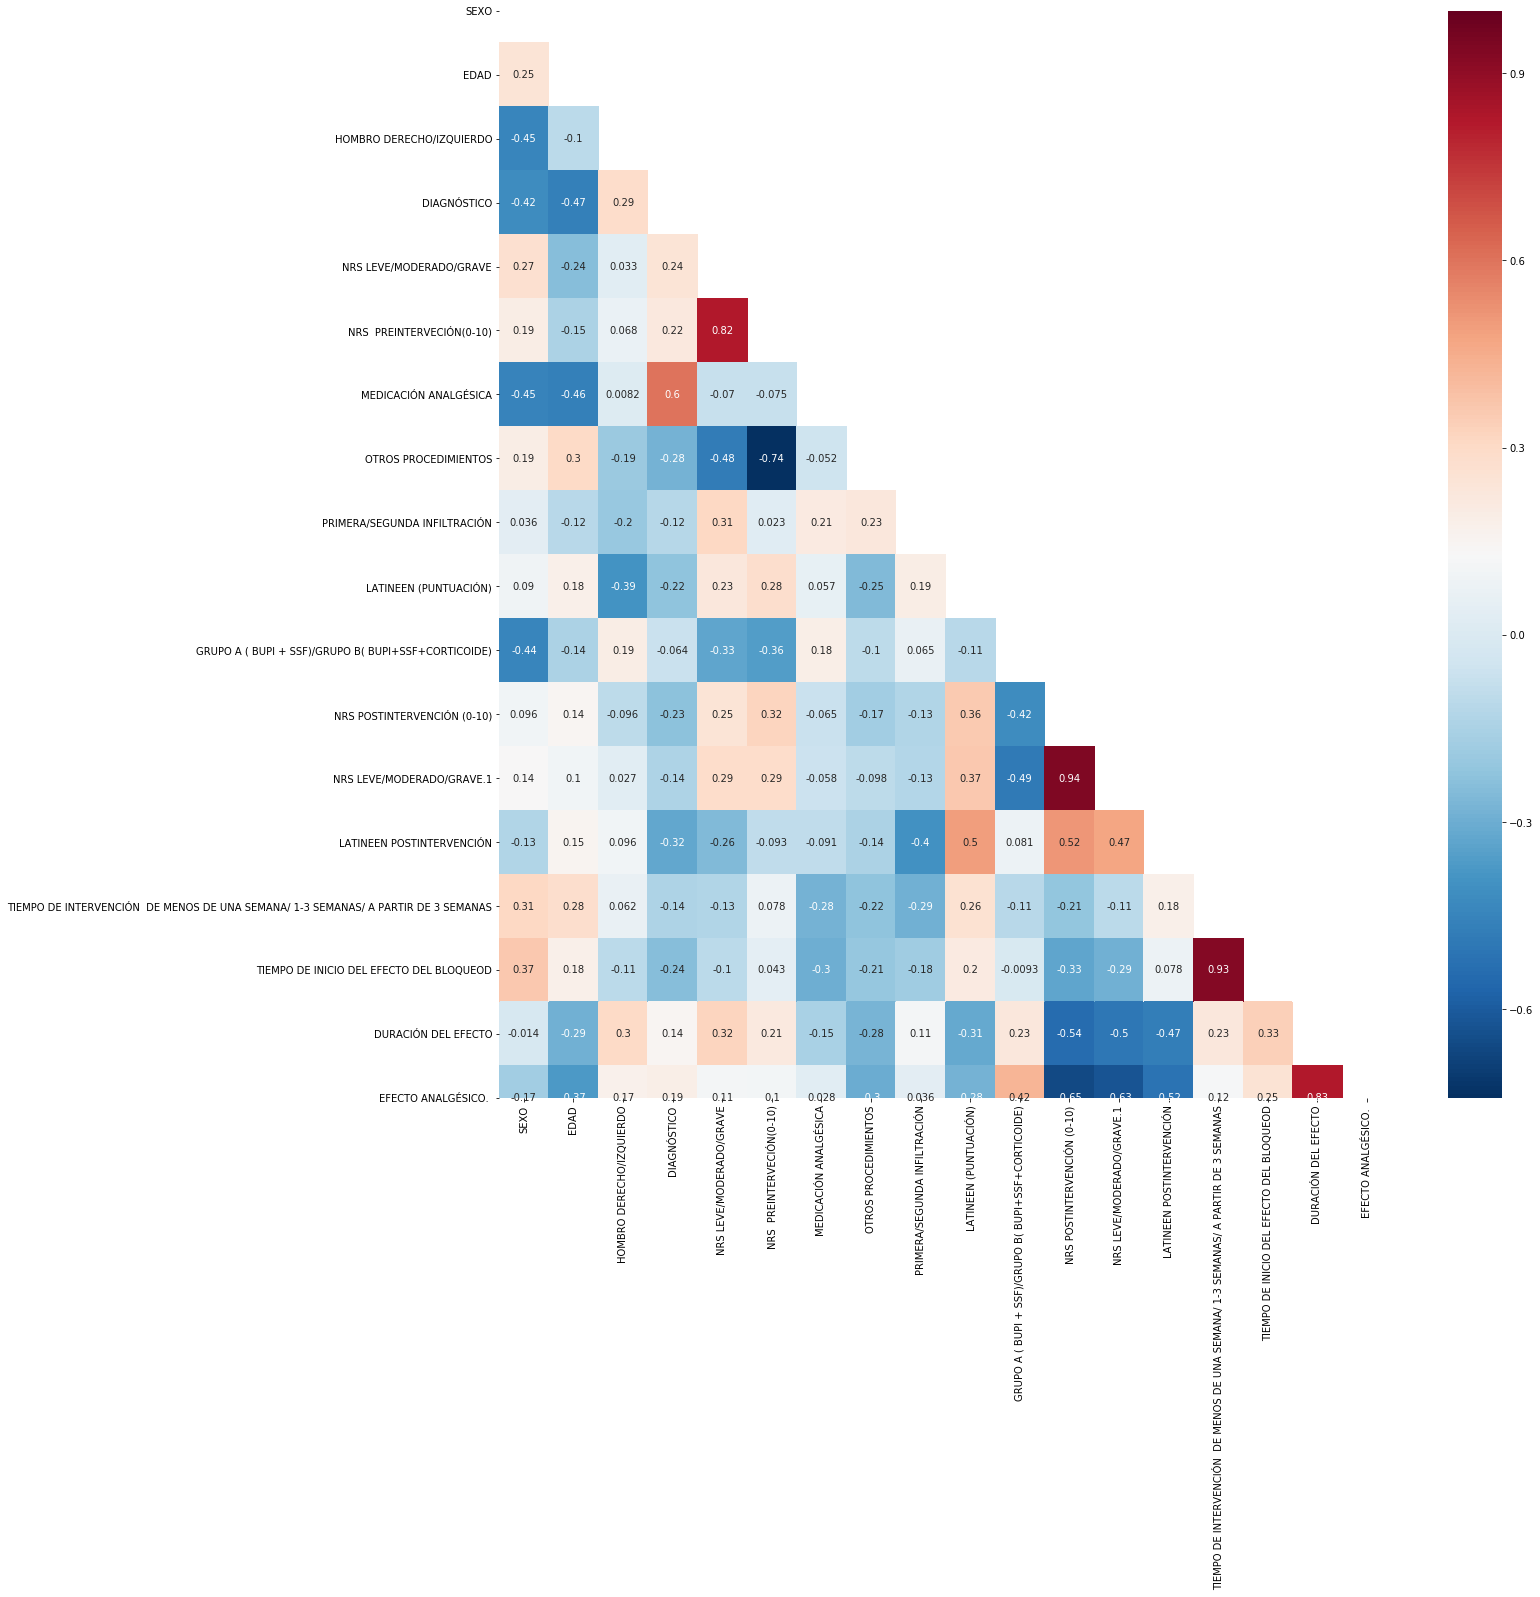

In [16]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [17]:
df.groupby(['DIAGNÓSTICO']).count()

SEXO  EDAD  HOMBRO DERECHO/IZQUIERDO  NRS LEVE/MODERADO/GRAVE  \
DIAGNÓSTICO                                                                  
0               2     2                         2                        2   
1               2     2                         2                        2   
2              10    10                        10                       10   
3               3     3                         3                        3   
4               1     1                         1                        1   

             NRS  PREINTERVECIÓN(0-10)  MEDICACIÓN ANALGÉSICA  \
DIAGNÓSTICO                                                     
0                                    2                      2   
1                                    2                      2   
2                                   10                     10   
3                                    3                      3   
4                                    1                      1   

             OTROS PROCEDIMIENTOS  PRIMERA/SEGUNDA INFILTRACIÓN  \
DIAGNÓSTICO                                                       
0                               2                             2   
1                               2                             2   
2                              10                            10   
3                               3                             3   
4                               1                             1   

             LATINEEN (PUNTUACIÓN)  \
DIAGNÓSTICO                          
0                                2   
1                                2   
2                               10   
3                                3   
4                                1   

             GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
DIAGNÓSTICO                                                        
0                                                            2     
1                                                            2     
2                                                           10     
3                                                            3     
4                                                            1     

             NRS POSTINTERVENCIÓN (0-10)  NRS LEVE/MODERADO/GRAVE.1  \
DIAGNÓSTICO                                                           
0                                      2                          2   
1                                      2                          2   
2                                     10                         10   
3                                      3                          3   
4                                      1                          1   

             LATINEEN POSTINTERVENCIÓN  \
DIAGNÓSTICO                              
0                                    2   
1                                    2   
2                                   10   
3                                    3   
4                                    1   

             TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
DIAGNÓSTICO                                                                                       
0                                                            2                                    
1                                                            2                                    
2                                                           10                                    
3                                                            3                                    
4                                                            1                                    

             TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD  DURACIÓN DEL EFECTO  \
DIAGNÓSTICO                                                                  
0                                                   2                    2   
1                                                   2                    2 

In [18]:
df.groupby(['GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)']).sum()

SEXO  EDAD  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...               
0                                                      9   648   
1                                                      4   487   

                                                    HOMBRO DERECHO/IZQUIERDO  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                             
0                                                                          2   
1                                                                          3   

                                                    DIAGNÓSTICO  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                
0                                                            20   
1                                                            15   

                                                    NRS LEVE/MODERADO/GRAVE  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                            
0                                                                        29   
1                                                                        21   

                                                    NRS  PREINTERVECIÓN(0-10)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                          79   
1                                                                          55   

                                                    MEDICACIÓN ANALGÉSICA  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                          
0                                                                      25   
1                                                                      25   

                                                    OTROS PROCEDIMIENTOS  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                         
0                                                                      6   
1                                                                      4   

                                                    PRIMERA/SEGUNDA INFILTRACIÓN  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                 
0                                                                              4   
1                                                                              4   

                                                    LATINEEN (PUNTUACIÓN)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                          
0                                                                     128   
1                                                                      98   

                                                    NRS POSTINTERVENCIÓN (0-10)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                
0                                                                            65   
1                                                                            38   

                                                    NRS LEVE/MODERADO/GRAVE.1  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                          25   
1                                                                          14   

                                                    LATINEEN POSTINTERVENCIÓN  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                          78   
1                                                                          67   

                                                    TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                                                                       
0                                   

In [19]:
df.groupby(['SEXO']).count()

EDAD  HOMBRO DERECHO/IZQUIERDO  DIAGNÓSTICO  NRS LEVE/MODERADO/GRAVE  \
SEXO                                                                         
0        5                         5            5                        5   
1       13                        13           13                       13   

      NRS  PREINTERVECIÓN(0-10)  MEDICACIÓN ANALGÉSICA  OTROS PROCEDIMIENTOS  \
SEXO                                                                           
0                             5                      5                     5   
1                            13                     13                    13   

      PRIMERA/SEGUNDA INFILTRACIÓN  LATINEEN (PUNTUACIÓN)  \
SEXO                                                        
0                                5                      5   
1                               13                     13   

      GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
SEXO                                                        
0                                                     5     
1                                                    13     

      NRS POSTINTERVENCIÓN (0-10)  NRS LEVE/MODERADO/GRAVE.1  \
SEXO                                                           
0                               5                          5   
1                              13                         13   

      LATINEEN POSTINTERVENCIÓN  \
SEXO                              
0                             5   
1                            13   

      TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
SEXO                                                                                       
0                                                     5                                    
1                                                    13                                    

      TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD  DURACIÓN DEL EFECTO  \
SEXO                                                                  
0                                            5                    5   
1                                           13                   13   

      EFECTO ANALGÉSICO.   
SEXO                       
0                       5  
1                      13

In [20]:
df.groupby(['NRS LEVE/MODERADO/GRAVE']).mean()

SEXO       EDAD  HOMBRO DERECHO/IZQUIERDO  \
NRS LEVE/MODERADO/GRAVE                                                  
2                        0.500000  69.250000                  0.250000   
3                        0.785714  61.285714                  0.285714   

                         DIAGNÓSTICO  NRS  PREINTERVECIÓN(0-10)  \
NRS LEVE/MODERADO/GRAVE                                           
2                           1.500000                   5.250000   
3                           2.071429                   8.071429   

                         MEDICACIÓN ANALGÉSICA  OTROS PROCEDIMIENTOS  \
NRS LEVE/MODERADO/GRAVE                                                
2                                     3.000000              1.000000   
3                                     2.714286              0.428571   

                         PRIMERA/SEGUNDA INFILTRACIÓN  LATINEEN (PUNTUACIÓN)  \
NRS LEVE/MODERADO/GRAVE                                                        
2                                            0.000000              11.500000   
3                                            0.571429              12.857143   

                         GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
NRS LEVE/MODERADO/GRAVE                                                        
2                                                                 0.750000     
3                                                                 0.357143     

                         NRS POSTINTERVENCIÓN (0-10)  \
NRS LEVE/MODERADO/GRAVE                                
2                                               4.75   
3                                               6.00   

                         NRS LEVE/MODERADO/GRAVE.1  LATINEEN POSTINTERVENCIÓN  \
NRS LEVE/MODERADO/GRAVE                                                         
2                                         1.750000                   9.750000   
3                                         2.285714                   7.571429   

                         TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
NRS LEVE/MODERADO/GRAVE                                                                                       
2                                                                 0.500000                                    
3                                                                 0.285714                                    

                         TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD  \
NRS LEVE/MODERADO/GRAVE                                             
2                                                        7.250000   
3                                                        5.571429   

                         DURACIÓN DEL EFECTO  EFECTO ANALGÉSICO.   
NRS LEVE/MODERADO/GRAVE                                            
2                                   8.750000                 1.75  
3                                  18.714286                 2.00

In [21]:
df.groupby(['NRS LEVE/MODERADO/GRAVE']).count()

SEXO  EDAD  HOMBRO DERECHO/IZQUIERDO  DIAGNÓSTICO  \
NRS LEVE/MODERADO/GRAVE                                                      
2                           4     4                         4            4   
3                          14    14                        14           14   

                         NRS  PREINTERVECIÓN(0-10)  MEDICACIÓN ANALGÉSICA  \
NRS LEVE/MODERADO/GRAVE                                                     
2                                                4                      4   
3                                               14                     14   

                         OTROS PROCEDIMIENTOS  PRIMERA/SEGUNDA INFILTRACIÓN  \
NRS LEVE/MODERADO/GRAVE                                                       
2                                           4                             4   
3                                          14                            14   

                         LATINEEN (PUNTUACIÓN)  \
NRS LEVE/MODERADO/GRAVE                          
2                                            4   
3                                           14   

                         GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
NRS LEVE/MODERADO/GRAVE                                                        
2                                                                        4     
3                                                                       14     

                         NRS POSTINTERVENCIÓN (0-10)  \
NRS LEVE/MODERADO/GRAVE                                
2                                                  4   
3                                                 14   

                         NRS LEVE/MODERADO/GRAVE.1  LATINEEN POSTINTERVENCIÓN  \
NRS LEVE/MODERADO/GRAVE                                                         
2                                                4                          4   
3                                               14                         14   

                         TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
NRS LEVE/MODERADO/GRAVE                                                                                       
2                                                                        4                                    
3                                                                       14                                    

                         TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD  \
NRS LEVE/MODERADO/GRAVE                                             
2                                                               4   
3                                                              14   

                         DURACIÓN DEL EFECTO  EFECTO ANALGÉSICO.   
NRS LEVE/MODERADO/GRAVE                                            
2                                          4                    4  
3                                         14                   14

In [22]:
df.groupby(['MEDICACIÓN ANALGÉSICA']).mean()

SEXO       EDAD  HOMBRO DERECHO/IZQUIERDO  \
MEDICACIÓN ANALGÉSICA                                                  
0                      1.000000  58.000000                  1.000000   
1                      1.000000  70.000000                  0.000000   
2                      0.777778  66.000000                  0.222222   
3                      0.666667  69.333333                  0.333333   
4                      1.000000  72.000000                  0.000000   
5                      1.000000  51.000000                  0.000000   
6                      0.000000  37.000000                  0.000000   
7                      0.000000  45.000000                  1.000000   

                       DIAGNÓSTICO  NRS LEVE/MODERADO/GRAVE  \
MEDICACIÓN ANALGÉSICA                                         
0                         1.000000                 3.000000   
1                         0.000000                 2.000000   
2                         1.888889                 2.777778   
3                         2.000000                 3.000000   
4                         2.000000                 3.000000   
5                         3.000000                 3.000000   
6                         2.000000                 3.000000   
7                         4.000000                 2.000000   

                       NRS  PREINTERVECIÓN(0-10)  OTROS PROCEDIMIENTOS  \
MEDICACIÓN ANALGÉSICA                                                    
0                                       7.000000              1.000000   
1                                       5.000000              1.000000   
2                                       7.666667              0.444444   
3                                       8.000000              0.666667   
4                                       9.000000              0.000000   
5                                       7.000000              1.000000   
6                                       8.000000              0.000000   
7                                       5.000000              1.000000   

                       PRIMERA/SEGUNDA INFILTRACIÓN  LATINEEN (PUNTUACIÓN)  \
MEDICACIÓN ANALGÉSICA                                                        
0                                          1.000000               8.000000   
1                                          0.000000              14.000000   
2                                          0.222222              12.333333   
3                                          0.666667              14.000000   
4                                          0.000000              14.000000   
5                                          1.000000              15.000000   
6                                          2.000000              15.000000   
7                                          0.000000               7.000000   

                       GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)  \
MEDICACIÓN ANALGÉSICA                                                        
0                                                               0.000000     
1                                                               1.000000     
2                                                               0.444444     
3                                                               0.333333     
4                                                               0.000000     
5                                                               0.000000     
6                                                               1.000000     
7                                                               1.000000     

                       NRS POSTINTERVENCIÓN (0-10)  NRS LEVE/MODERADO/GRAVE.1  \
MEDICACIÓN ANALGÉSICA                                                           
0                                         7.000000                   3.000000   
1                                         6.000000                   2.000000   
2                                         4.7777

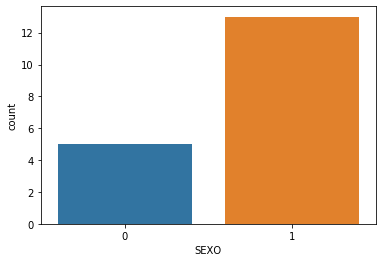

In [23]:
sns.countplot(df['SEXO'])

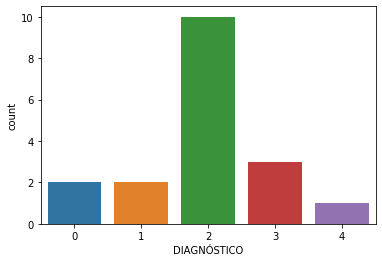

In [24]:
sns.countplot(df['DIAGNÓSTICO'])

In [25]:
import plotly.graph_objs as go 
import plotly.offline as py


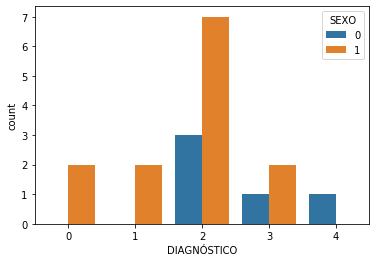

In [26]:
sns.countplot(df['DIAGNÓSTICO'],hue=df['SEXO'])

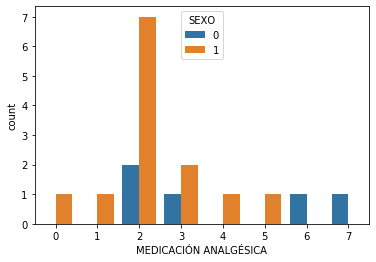

In [27]:
sns.countplot(df['MEDICACIÓN ANALGÉSICA'],hue=df['SEXO'])

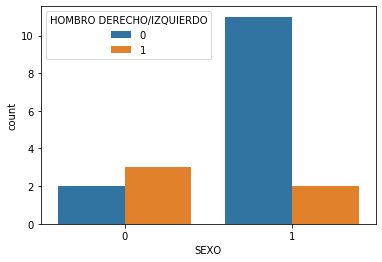

In [28]:
sns.countplot(df['SEXO'],hue=df['HOMBRO DERECHO/IZQUIERDO'])

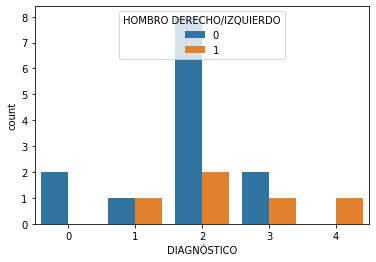

In [29]:
sns.countplot(df['DIAGNÓSTICO'],hue=df['HOMBRO DERECHO/IZQUIERDO'])

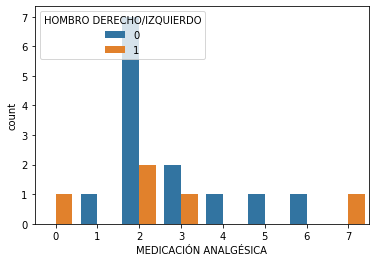

In [30]:
sns.countplot(df['MEDICACIÓN ANALGÉSICA'],hue=df['HOMBRO DERECHO/IZQUIERDO'])

In [31]:
df['combinado_Sexo_DIAGNOSTICO'] = df.apply(lambda x:'%s_%s' % (x['DIAGNÓSTICO'],x['SEXO']),axis=1)
print(df['combinado_Sexo_DIAGNOSTICO'].unique())

['0_1' '1_1' '2_1' '3_0' '3_1' '2_0' '4_0']


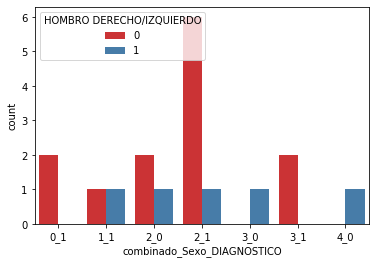

In [32]:
sns.countplot(df['combinado_Sexo_DIAGNOSTICO'],hue=df['HOMBRO DERECHO/IZQUIERDO'], orient='v', palette="Set1")

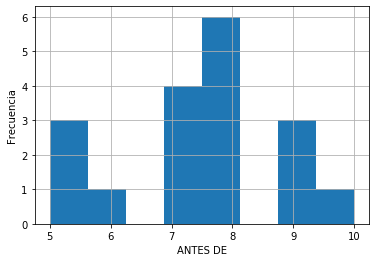

In [33]:
# histograma duración de erupciones con 8 barras
df['NRS  PREINTERVECIÓN(0-10)'].hist(bins=8) 
plt.xlabel("ANTES DE")
plt.ylabel("Frecuencia")
plt.show()

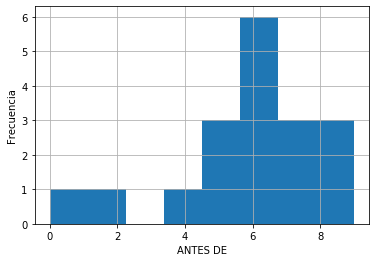

In [34]:
# histograma duración de erupciones con 8 barras
df['NRS POSTINTERVENCIÓN (0-10)'].hist(bins=8) 
plt.xlabel("ANTES DE")
plt.ylabel("Frecuencia")
plt.show()

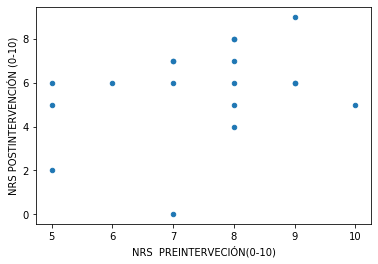

In [35]:
disp= df.plot(kind='scatter', x='NRS  PREINTERVECIÓN(0-10)', y='NRS POSTINTERVENCIÓN (0-10)')

In [36]:
from plotly.tools import FigureFactory as FF
import scipy

In [37]:
data1=df['NRS  PREINTERVECIÓN(0-10)']

In [38]:
data2=df['NRS POSTINTERVENCIÓN (0-10)']

In [39]:
twosample_results = scipy.stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

* H0 = la media de las dos poblaciones son iguales
* H1 = la media de las dos poblaciones son distintas

* El p_valor = 0.0079 que es menor que nuestro nivel de significacion (0.05), podemos decir que rechazamos la hipotesis nula, es decir, aceptamos la hipotesis alternativa, con lo cual ambos grupos tienen medias distinta signitficativamente

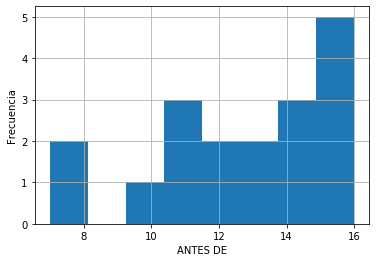

In [40]:
# histograma duración de erupciones con 8 barras
df['LATINEEN (PUNTUACIÓN)'].hist(bins=8) 
plt.xlabel("ANTES DE")
plt.ylabel("Frecuencia")
plt.show()

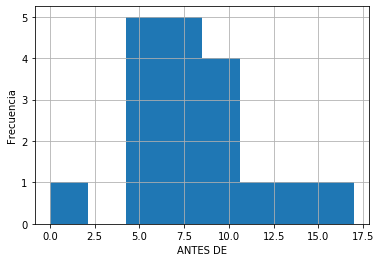

In [41]:
df['LATINEEN POSTINTERVENCIÓN'].hist(bins=8) 
plt.xlabel("ANTES DE")
plt.ylabel("Frecuencia")
plt.show()

In [42]:
data3=df['LATINEEN (PUNTUACIÓN)']

In [43]:
data4=df['LATINEEN POSTINTERVENCIÓN']

In [44]:
twosample_results = scipy.stats.ttest_ind(data3, data4)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

* El p_valor = 0.00013 que es menor que nuestro nivel de significacion (0.05), podemos decir que rechazamos la hipotesis nula, es decir, aceptamos la hipotesis alternativa, con lo cual ambos grupos tienen medias distinta signitficativamente

###############################################################################33

In [45]:
data_xls = pd.read_excel('HOMBRO1.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [46]:
df = pd.read_csv('csvfile.csv',low_memory=False)

In [47]:
df.drop(['DOMINANCIA'], axis = 1, inplace = True)

In [48]:
df.columns.values

array(['SEXO', 'EDAD', 'HOMBRO DERECHO/IZQUIERDO', 'DIAGNÓSTICO',
       'NRS LEVE/MODERADO/GRAVE', 'NRS  PREINTERVECIÓN(0-10)',
       'MEDICACIÓN ANALGÉSICA', 'OTROS PROCEDIMIENTOS',
       'PRIMERA/SEGUNDA INFILTRACIÓN', 'LATINEEN (PUNTUACIÓN)',
       'GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)',
       'NRS POSTINTERVENCIÓN (0-10)', 'NRS LEVE/MODERADO/GRAVE.1',
       'LATINEEN POSTINTERVENCIÓN',
       'TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS',
       'TIEMPO DE INICIO DEL EFECTO DEL BLOQUEOD', 'DURACIÓN DEL EFECTO',
       'EFECTO ANALGÉSICO. '], dtype=object)

In [49]:
grouped_gender = df.groupby("GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICOIDE)")

In [50]:
grouped_gender.groups


{0: Int64Index([2, 3, 4, 5, 6, 7, 9, 10, 12, 17], dtype='int64'),
 1: Int64Index([0, 1, 8, 11, 13, 14, 15, 16], dtype='int64')}

In [51]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

0
    SEXO  EDAD  HOMBRO DERECHO/IZQUIERDO  DIAGNÓSTICO  \
2      1    82                         0            1   
3      1    58                         0            2   
4      1    75                         1            2   
5      1    73                         0            2   
6      1    58                         1            1   
7      1    72                         0            2   
9      1    61                         0            3   
10     1    51                         0            3   
12     0    80                         0            2   
17     1    38                         0            2   

    NRS LEVE/MODERADO/GRAVE  NRS  PREINTERVECIÓN(0-10)  MEDICACIÓN ANALGÉSICA  \
2                         3                          8                      3   
3                         3                          8                      3   
4                         3                         10                      2   
5                         3                   

In [52]:
grouped_gender.mean()

SEXO    EDAD  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                 
0                                                    0.9  64.800   
1                                                    0.5  60.875   

                                                    HOMBRO DERECHO/IZQUIERDO  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                             
0                                                                      0.200   
1                                                                      0.375   

                                                    DIAGNÓSTICO  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                
0                                                         2.000   
1                                                         1.875   

                                                    NRS LEVE/MODERADO/GRAVE  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                            
0                                                                     2.900   
1                                                                     2.625   

                                                    NRS  PREINTERVECIÓN(0-10)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                       7.900   
1                                                                       6.875   

                                                    MEDICACIÓN ANALGÉSICA  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                          
0                                                                   2.500   
1                                                                   3.125   

                                                    OTROS PROCEDIMIENTOS  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                         
0                                                                    0.6   
1                                                                    0.5   

                                                    PRIMERA/SEGUNDA INFILTRACIÓN  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                 
0                                                                            0.4   
1                                                                            0.5   

                                                    LATINEEN (PUNTUACIÓN)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                          
0                                                                   12.80   
1                                                                   12.25   

                                                    NRS POSTINTERVENCIÓN (0-10)  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                
0                                                                          6.50   
1                                                                          4.75   

                                                    NRS LEVE/MODERADO/GRAVE.1  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                        2.50   
1                                                                        1.75   

                                                    LATINEEN POSTINTERVENCIÓN  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                              
0                                                                       7.800   
1                                                                       8.375   

                                                    TIEMPO DE INTERVENCIÓN  DE MENOS DE UNA SEMANA/ 1-3 SEMANAS/ A PARTIR DE 3 SEMANAS  \
GRUPO A ( BUPI + SSF)/GRUPO B( BUPI+SSF+CORTICO...                                                                                       
0                           